In [122]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
%matplotlib inline

In [2]:
bank = pd.read_csv('~/ADAN8888/data/raw/bank_raw.csv')

In [3]:
# Data Exploration 

In [4]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank.shape

(10000, 14)

In [6]:
# check data info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# check the unique values for each column
bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
# check missing values
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
bank[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Exited', ylabel='EstimatedSalary'>

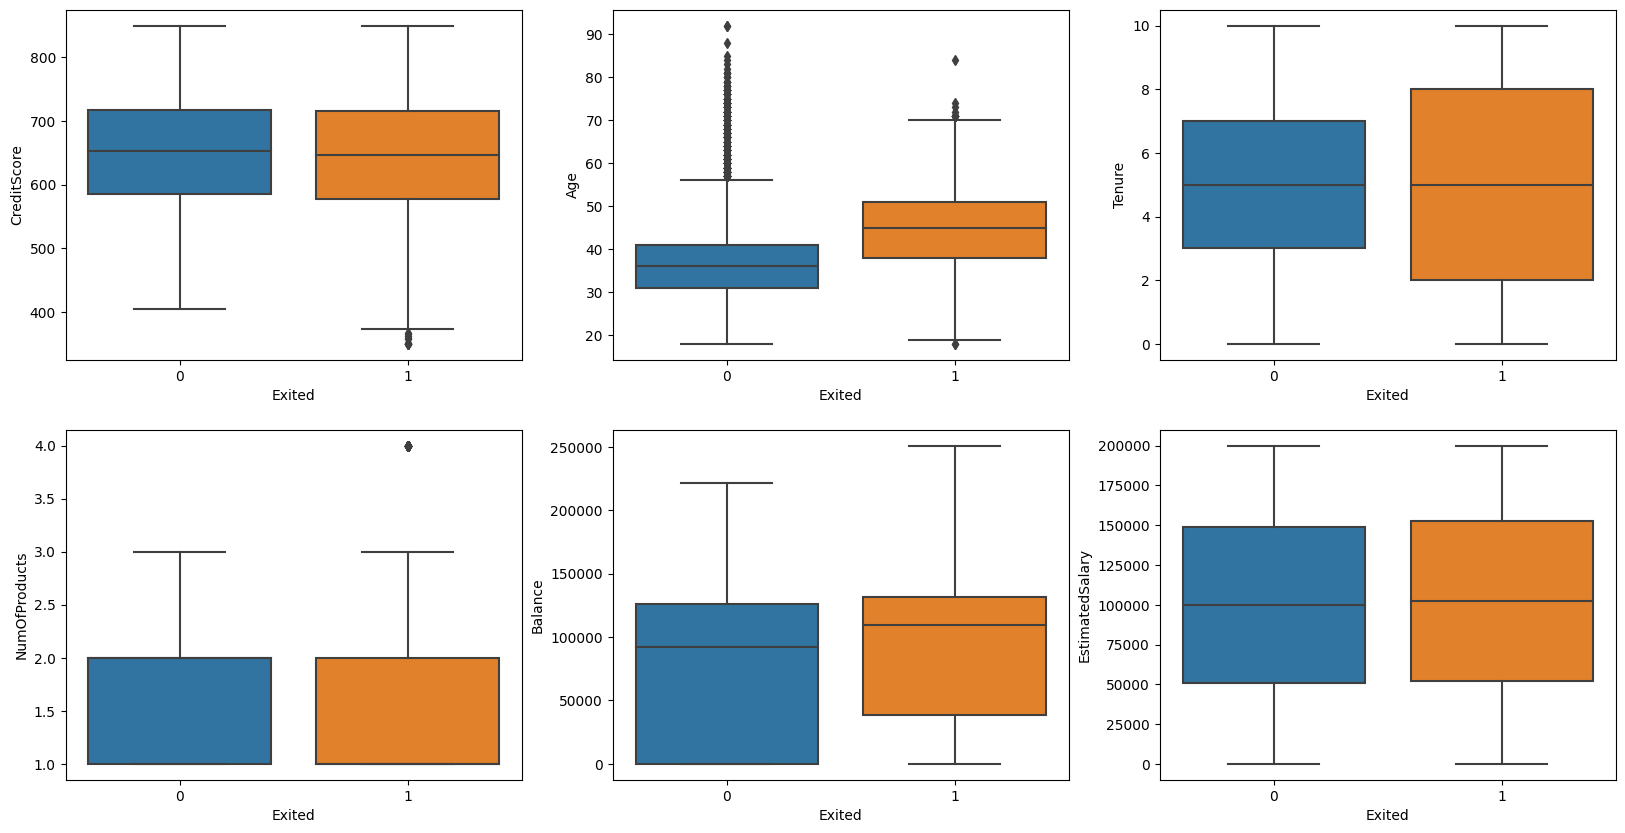

In [11]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=bank, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=bank, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=bank, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=bank, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=bank, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=bank, ax=axss[1][2])

<AxesSubplot: xlabel='Exited', ylabel='count'>

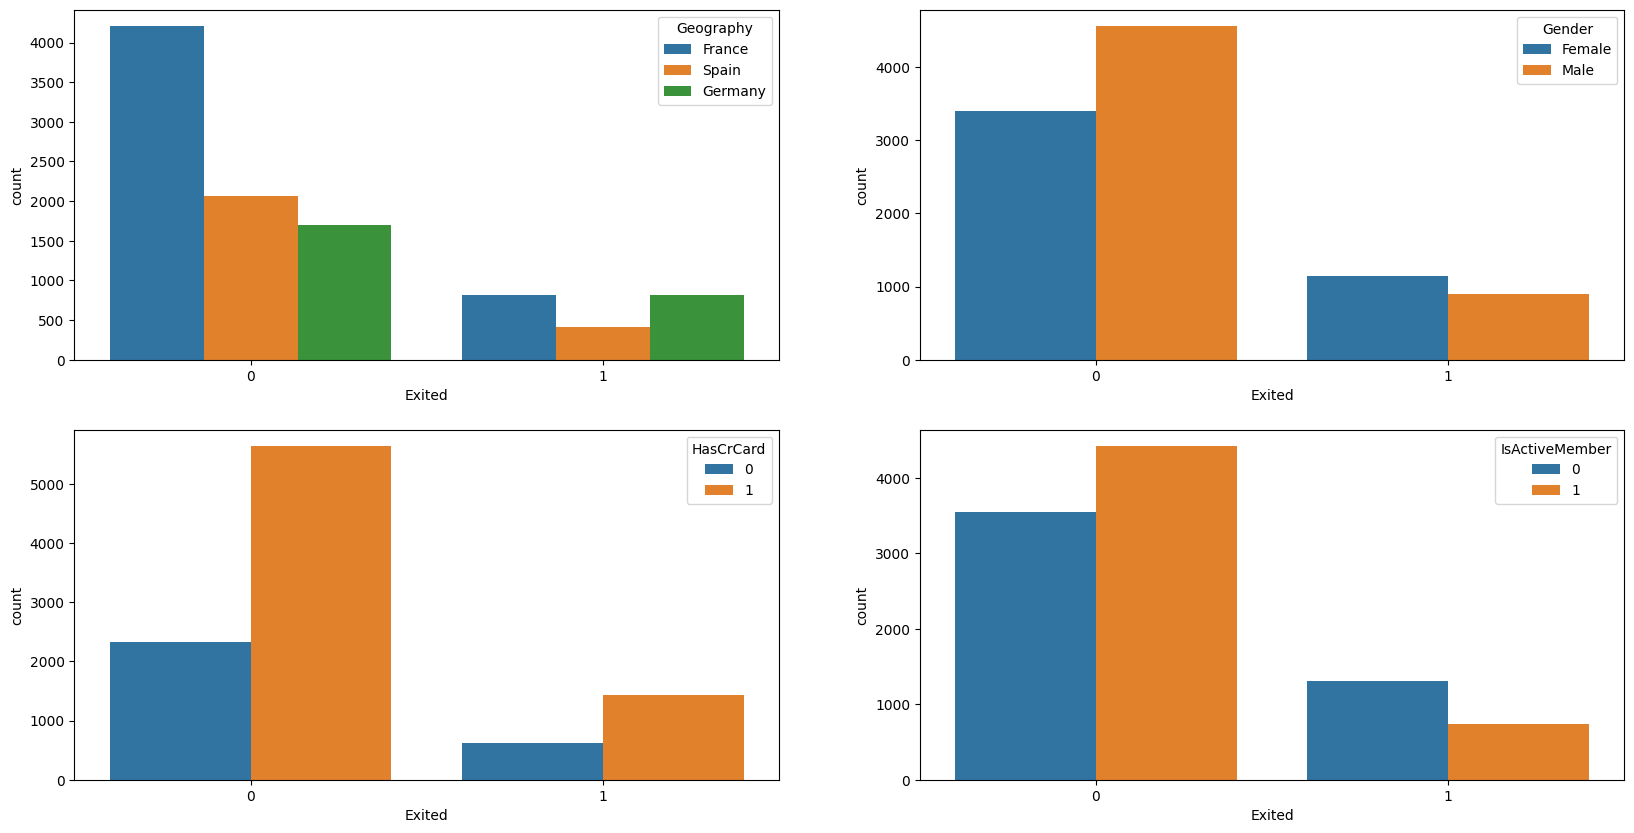

In [12]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=bank, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=bank, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=bank, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=bank, ax=axss[1][1])

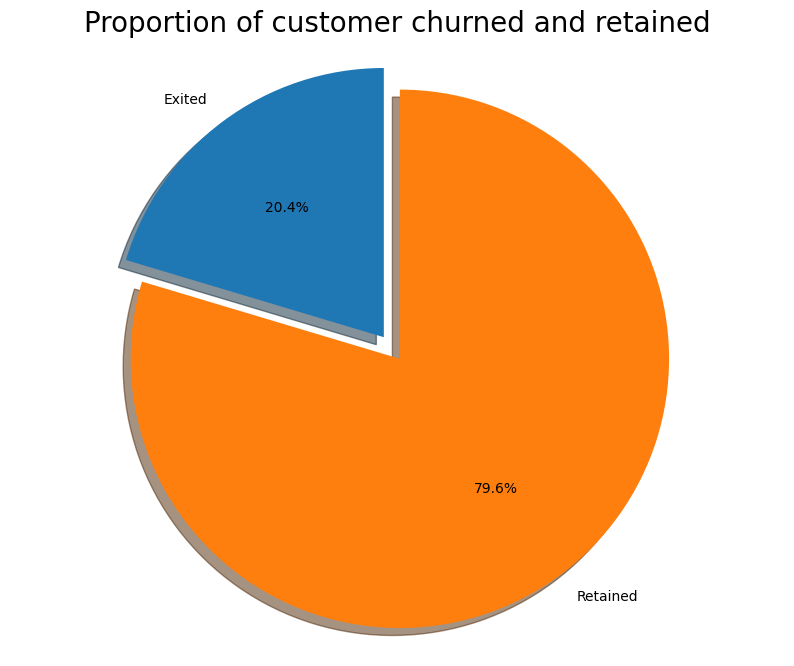

In [13]:
labels = 'Exited', 'Retained'
sizes = [bank.Exited[bank['Exited']==1].count(), bank.Exited[bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

WEEK 5

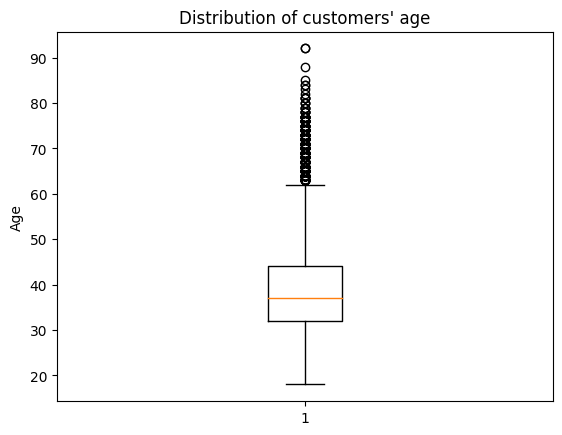

In [14]:
plt.boxplot(bank['Age'])
plt.title("Distribution of customers' age")
plt.ylabel('Age')
plt.show()

In [15]:
# Feature Preprocessing
# Drop useless feature
bank1 = bank.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [16]:
bank1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
bank1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
# Get target variable
y = bank1['Exited']

In [19]:
# convert categorical varaiables to numerical variables
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
bank1['Gender']= lb.fit_transform(bank1['Gender'])

In [20]:
bank1 = pd.get_dummies(bank1, columns = ['Geography'])

In [21]:
X = bank1
X = bank1.drop(['Exited'], axis = 1)

In [22]:
X.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0


In [23]:
# WEEK 6

In [24]:
# Split data into training and testing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 

In [25]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,686,1,32,6,0.00,2,1,1,179093.26,1,0,0
1561,632,1,42,4,119624.60,2,1,1,195978.86,0,1,0
1670,559,1,24,3,114739.92,1,1,0,85891.02,0,0,1
6087,561,0,27,9,135637.00,1,1,0,153080.40,1,0,0
6669,517,1,56,9,142147.32,1,0,0,39488.04,1,0,0


In [26]:
# variation 1

In [27]:
# split the training set into training and validation
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train a Logistic Regression Classifier on the training set
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Compute accuracy, precision, and recall on the training and validation sets
acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_val = accuracy_score(y_val, clf.predict(X_val))
prec_train = precision_score(y_train, clf.predict(X_train))
prec_val = precision_score(y_val, clf.predict(X_val))
rec_train = recall_score(y_train, clf.predict(X_train))
rec_val = recall_score(y_val, clf.predict(X_val))

# Print the metrics
print("Training Accuracy:", acc_train)
print("Validation Accuracy:", acc_val)
print("Training Precision:", prec_train)
print("Validation Precision:", prec_val)
print("Training Recall:", rec_train)
print("Validation Recall:", rec_val)

Training Accuracy: 0.78671875
Validation Accuracy: 0.789375
Training Precision: 0.3736842105263158
Validation Precision: 0.38636363636363635
Training Recall: 0.053910402429764616
Validation Recall: 0.05198776758409786


In [29]:
# variation 2 logistic regression model with hyperparamters tuing 

In [30]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [31]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l2','l1'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [32]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8104687499999998
Best parameters set:
C:0.1
penalty:l1


In [33]:
# best lg
best_LG_model = Grid_LR.best_estimator_

In [34]:
# Make predictions on the training set
y_train_pred2 = best_LG_model.predict(X_train)

In [35]:
# Calculate performance metrics on the training set
train_acc2 = accuracy_score(y_train, y_train_pred2)
train_prec2 = precision_score(y_train, y_train_pred2, average='macro')
train_rec2 = recall_score(y_train, y_train_pred2, average='macro')
train_f1_2 = f1_score(y_train, y_train_pred2, average='macro')

In [36]:
# Make predictions on the validation set
y_val_pred2 = best_LG_model.predict(X_val)

In [37]:
# Calculate performance metrics on the validation set
val_acc2 = accuracy_score(y_val, y_val_pred2)
val_prec2 = precision_score(y_val, y_val_pred2, average='macro')
val_rec2 = recall_score(y_val, y_val_pred2, average='macro')
val_f1_2 = f1_score(y_val, y_val_pred2, average='macro')

In [38]:
# variation 3 l2 penalty 

In [39]:
# Train a Logistic Regression Classifier on the training set
lg_3 = LogisticRegression(penalty='l2', C=100.0, random_state=42)
lg_3.fit(X_train, y_train)

# Compute accuracy, precision, and recall on the training and validation sets
acc_train = accuracy_score(y_train, lg_3.predict(X_train))
acc_val = accuracy_score(y_val, lg_3.predict(X_val))
prec_train = precision_score(y_train, lg_3.predict(X_train))
prec_val = precision_score(y_val, lg_3.predict(X_val))
rec_train = recall_score(y_train, lg_3.predict(X_train))
rec_val = recall_score(y_val, lg_3.predict(X_val))

# Print the metrics
print("Training Accuracy:", acc_train)
print("Validation Accuracy:", acc_val)
print("Training Precision:", prec_train)
print("Validation Precision:", prec_val)
print("Training Recall:", rec_train)
print("Validation Recall:", rec_val)

Training Accuracy: 0.78671875
Validation Accuracy: 0.789375
Training Precision: 0.3736842105263158
Validation Precision: 0.38636363636363635
Training Recall: 0.053910402429764616
Validation Recall: 0.05198776758409786


In [40]:
# Week 7 Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [42]:
# variation 1: base model-without tuning the hyperparameter

In [43]:
# Define the base model
RF_model1 = RandomForestClassifier(random_state=42)

In [44]:
# Train the base model
RF_model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Make predictions on the training set
y_train_pred = RF_model1.predict(X_train)

In [46]:
# Calculate performance metrics on the training set
train_acc1 = accuracy_score(y_train, y_train_pred)
train_prec1 = precision_score(y_train, y_train_pred, average='macro')
train_rec1 = recall_score(y_train, y_train_pred, average='macro')
train_f1_1 = f1_score(y_train, y_train_pred, average='macro')

In [47]:
# Make predictions on the validation set
y_val_pred = RF_model1.predict(X_val)

In [48]:
# Calculate performance metrics on the validation set
val_acc1 = accuracy_score(y_val, y_val_pred)
val_prec1 = precision_score(y_val, y_val_pred, average='macro')
val_rec1 = recall_score(y_val, y_val_pred, average='macro')
val_f1_1 = f1_score(y_val, y_val_pred, average='macro')

In [49]:
# variation 2: use grid serach to tune the hyperparameter

In [50]:
# Define the tuned model
parameters = {'n_estimators':[60, 80, 100], 'max_depth':[1, 5, 10]}
RF_model2 = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5)

In [51]:
# Train the tuned model
RF_model2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [52]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))
# best number of tress
print_grid_search_metrics(RF_model2)

Best score: 0.8612499999999998
Best parameters set:
max_depth:10
n_estimators:80


In [53]:
# best random forest
best_RF_model = RF_model2.best_estimator_

In [54]:
best_RF_model

RandomForestClassifier(max_depth=10, n_estimators=80, random_state=42)

In [55]:
# Make predictions on the training set
y_train_pred2 = best_RF_model.predict(X_train)

In [56]:
# Calculate performance metrics on the training set
train_acc2 = accuracy_score(y_train, y_train_pred2)
train_prec2 = precision_score(y_train, y_train_pred2, average='macro')
train_rec2 = recall_score(y_train, y_train_pred2, average='macro')
train_f1_2 = f1_score(y_train, y_train_pred2, average='macro')

In [57]:
# Make predictions on the validation set
y_val_pred2 = RF_model2.predict(X_val)

In [58]:
# Calculate performance metrics on the validation set
val_acc2 = accuracy_score(y_val, y_val_pred2)
val_prec2 = precision_score(y_val, y_val_pred2, average='macro')
val_rec2 = recall_score(y_val, y_val_pred2, average='macro')
val_f1_2 = f1_score(y_val, y_val_pred2, average='macro')

In [59]:
# variation 3: small-trees model

In [60]:
RF_model3 = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)

In [61]:
# Train the small-trees model
RF_model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [62]:
# Make predictions on the training set
y_train_pred3 = RF_model3.predict(X_train)

In [63]:
# Calculate performance metrics on the training set
train_acc3 = accuracy_score(y_train, y_train_pred3)
train_prec3 = precision_score(y_train, y_train_pred3, average='macro')
train_rec3 = recall_score(y_train, y_train_pred3, average='macro')
train_f1_3 = f1_score(y_train, y_train_pred3, average='macro')

In [64]:
# Make predictions on the validation set
y_val_pred3 = RF_model3.predict(X_val)

In [65]:
# Calculate performance metrics on the validation set
val_acc3 = accuracy_score(y_val, y_val_pred3)
val_prec3 = precision_score(y_val, y_val_pred3, average='macro')
val_rec3 = recall_score(y_val, y_val_pred3, average='macro')
val_f1_3 = f1_score(y_val, y_val_pred3, average='macro')

In [66]:
# Create a table to compare the performance metrics of the three models
table = pd.DataFrame({
    'Model': ['Random Forest (base)', 'Random Forest (tuned)', 'Random Forest (small trees)'],
    'Train Accuracy': [train_acc1, train_acc2, train_acc3],
    'Train Precision': [train_prec1, train_prec2, train_prec3],
    'Train Recall': [train_rec1, train_rec2, train_rec3],
    'Train F1-Score': [train_f1_1, train_f1_2, train_f1_3],
    'Validation Accuracy': [val_acc1, val_acc2, val_acc3],
    'Validation Precision': [val_prec1, val_prec2, val_prec3],
    'Validation Recall': [val_rec1, val_rec2, val_rec3],
    'Validation F1-Score': [val_f1_1, val_f1_2, val_f1_3]
})

# Set the model column as the index
table.set_index('Model', inplace=True)

# Print the table
print(table)

                             Train Accuracy  Train Precision  Train Recall  \
Model                                                                        
Random Forest (base)               0.999844         0.999902      0.999620   
Random Forest (tuned)              0.902656         0.923887      0.773885   
Random Forest (small trees)        0.833594         0.847013      0.609174   

                             Train F1-Score  Validation Accuracy  \
Model                                                              
Random Forest (base)               0.999761             0.860625   
Random Forest (tuned)              0.821528             0.863125   
Random Forest (small trees)        0.632358             0.831250   

                             Validation Precision  Validation Recall  \
Model                                                                  
Random Forest (base)                     0.818546           0.712427   
Random Forest (tuned)                    0.835563   

In [67]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2401
CreditScore : 0.1447
EstimatedSalary : 0.1444
Balance : 0.1421
NumOfProducts : 0.1303
Tenure : 0.0828
IsActiveMember : 0.0403
Geography_Germany : 0.0202
HasCrCard : 0.0187
Gender : 0.0172
Geography_France : 0.0097
Geography_Spain : 0.0096


In [68]:
# week 8 XGBoost

In [69]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
# variation 1: Default hyperparameters (default: max_depth = 6, min_child_weight = 1, learning_rate =0.3)

In [71]:
# Default hyperparameters
xgb_model1 = xgb.XGBClassifier()

In [72]:
# Train the base model
xgb_model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
# Make predictions on the training set
y_train_pred = xgb_model1.predict(X_train)

In [74]:
# Calculate performance metrics on the training set
train_acc1 = accuracy_score(y_train, y_train_pred)
train_prec1 = precision_score(y_train, y_train_pred, average='macro')
train_rec1 = recall_score(y_train, y_train_pred, average='macro')
train_f1_1 = f1_score(y_train, y_train_pred, average='macro')

In [75]:
# Make predictions on the validation set
y_val_pred = xgb_model1.predict(X_val)

In [76]:
# Calculate performance metrics on the validation set
val_acc1 = accuracy_score(y_val, y_val_pred)
val_prec1 = precision_score(y_val, y_val_pred, average='macro')
val_rec1 = recall_score(y_val, y_val_pred, average='macro')
val_f1_1 = f1_score(y_val, y_val_pred, average='macro')

In [77]:
# Variation 2: Decreased learning_rate to 0.1 and max_depth to 5

In [78]:
# xgb_model2 = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, subsample=0.7)

In [79]:
xgb_model2 = xgb.XGBClassifier(
learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [80]:
# Train the model
xgb_model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [81]:
# Make predictions on the training set
y_train_pred2 = xgb_model2.predict(X_train)

In [82]:
# Calculate performance metrics on the training set
train_acc2 = accuracy_score(y_train, y_train_pred2)
train_prec2 = precision_score(y_train, y_train_pred2, average='macro')
train_rec2 = recall_score(y_train, y_train_pred2, average='macro')
train_f1_2 = f1_score(y_train, y_train_pred2, average='macro')

In [83]:
# Make predictions on the validation set
y_val_pred2 = xgb_model2.predict(X_val)

In [84]:
# Calculate performance metrics on the validation set
val_acc2 = accuracy_score(y_val, y_val_pred2)
val_prec2 = precision_score(y_val, y_val_pred2, average='macro')
val_rec2 = recall_score(y_val, y_val_pred2, average='macro')
val_f1_2 = f1_score(y_val, y_val_pred2, average='macro')

In [85]:
# Variation 3: Decreased n_estimators and max_depths

In [87]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


xgb_model3 = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=3,
                         min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1, random_state=42)

In [88]:
# train the model
xgb_model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [89]:
# Make predictions on the training set
y_train_pred3 = xgb_model3.predict(X_train)

In [90]:
# Calculate performance metrics on the training set
train_acc3 = accuracy_score(y_train, y_train_pred3)
train_prec3 = precision_score(y_train, y_train_pred3, average='macro')
train_rec3 = recall_score(y_train, y_train_pred3, average='macro')
train_f1_3 = f1_score(y_train, y_train_pred3, average='macro')

In [91]:
# Make predictions on the validation set
y_val_pred3 = xgb_model3.predict(X_val)

In [92]:
# Calculate performance metrics on the validation set
val_acc3 = accuracy_score(y_val, y_val_pred3)
val_prec3 = precision_score(y_val, y_val_pred3, average='macro')
val_rec3 = recall_score(y_val, y_val_pred3, average='macro')
val_f1_3 = f1_score(y_val, y_val_pred3, average='macro')

In [93]:
# Create a table to compare the performance metrics of the three models
table = pd.DataFrame({
    'Model': ['Default hyperparameters', 
              'Decreased learning_rate and max_depth', 
              'Increased min_child_weight and Decreased more in max_depth'],
    'Train Accuracy': [train_acc1, train_acc2, train_acc3],
    'Train Precision': [train_prec1, train_prec2, train_prec3],
    'Train Recall': [train_rec1, train_rec2, train_rec3],
    'Train F1-Score': [train_f1_1, train_f1_2, train_f1_3],
    'Validation Accuracy': [val_acc1, val_acc2, val_acc3],
    'Validation Precision': [val_prec1, val_prec2, val_prec3],
    'Validation Recall': [val_rec1, val_rec2, val_rec3],
    'Validation F1-Score': [val_f1_1, val_f1_2, val_f1_3]
})

# Set the model column as the index
table.set_index('Model', inplace=True)

# Print the table
print(table)

                                                    Train Accuracy  \
Model                                                                
Default hyperparameters                                   0.965000   
Decreased learning_rate and max_depth                     0.998437   
Increased min_child_weight and Decreased more i...        0.878594   

                                                    Train Precision  \
Model                                                                 
Default hyperparameters                                    0.969479   
Decreased learning_rate and max_depth                      0.999018   
Increased min_child_weight and Decreased more i...         0.858901   

                                                    Train Recall  \
Model                                                              
Default hyperparameters                                 0.922553   
Decreased learning_rate and max_depth                   0.996203   
Increased min_child_w

In [94]:
# week 9

In [95]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection

np.random.seed(42)

# Define a list of models of varying complexity
models = [
    # Logistic Regression models with different regularization strengths
    LogisticRegression(),
    LogisticRegression(penalty='l2', C=0.2, random_state=42),
    LogisticRegression(penalty='l2', C=100.0, random_state=42),

    # Random Forest models with different tree depths
    RandomForestClassifier(),
    RandomForestClassifier(n_estimators=10, max_depth=80, random_state=42),
    RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42),

    # XGBoost models with different tree depths and learning rates
    XGBClassifier(random_state=42),
    XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, 
                  gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic',
                  nthread=4, scale_pos_weight=1, random_state=42),
    XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=3, min_child_weight=1, gamma=0, 
                  subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, 
                  scale_pos_weight=1, random_state=42),
]


# split the training set into training and validation
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

# Train the models and calculate their accuracy on the validation set
train_errors = []
val_errors = []
model_names = []
for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    val_error = 1 - accuracy_score(y_val, y_pred_val)
    train_errors.append(train_error)
    val_errors.append(val_error)
    model_names.append(type(model).__name__)
    print(f"{type(model).__name__} Validation Error: {val_error:.4f}")


LogisticRegression Validation Error: 0.2086
LogisticRegression Validation Error: 0.2086
LogisticRegression Validation Error: 0.2086
RandomForestClassifier Validation Error: 0.1430
RandomForestClassifier Validation Error: 0.1492
RandomForestClassifier Validation Error: 0.1820
XGBClassifier Validation Error: 0.1578
XGBClassifier Validation Error: 0.1547
XGBClassifier Validation Error: 0.1367


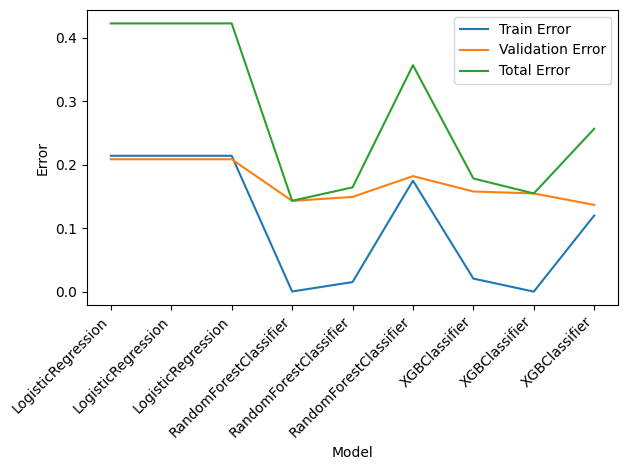

In [96]:
# Plot the bias-variance tradeoff chart for all models
x_values = range(1, len(models) + 1)
plt.plot(x_values, train_errors, label='Train Error')
plt.plot(x_values, val_errors, label='Validation Error')
plt.plot(x_values, np.add(train_errors, val_errors), label='Total Error')
plt.xticks(x_values, model_names, rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Error')
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
# Create a new feature based on age outliers
q1, q3 = np.percentile(X_train['Age'], [25, 75])
iqr = q3 - q1
age_outlier_threshold = q3 + 1.5 * iqr
X_train['age_outlier'] = (X_train['Age'] > age_outlier_threshold).astype(int)
X_val['age_outlier'] = (X_val['Age'] > age_outlier_threshold).astype(int)

In [106]:
print (age_outlier_threshold)

62.0


In [107]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,age_outlier
4693,543,0,32,7,147256.86,1,1,0,112771.95,1,0,0,0
3735,447,0,32,10,0.00,1,1,1,151815.76,1,0,0,0
9978,774,1,40,9,93017.47,2,1,0,191608.97,1,0,0,0
6580,527,0,30,6,126663.51,1,1,1,162267.91,0,1,0,0
366,540,0,42,9,87271.41,2,1,0,172572.64,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,622,1,31,7,0.00,1,1,0,35408.77,1,0,0,0
8580,529,0,31,6,152310.55,1,1,0,13054.25,1,0,0,0
4163,627,0,35,7,0.00,2,0,1,193022.44,1,0,0,0
8538,731,0,33,5,137388.01,2,1,0,165000.68,0,0,1,0


In [99]:
np.random.seed(42)
# Define a list of models of varying complexity
models = [
    # Logistic Regression models with different regularization strengths
    LogisticRegression(),
    LogisticRegression(penalty='l2', C=0.2, random_state=42),
    LogisticRegression(penalty='l2', C=100.0, random_state=42),

    # Random Forest models with different tree depths
    RandomForestClassifier(),
    RandomForestClassifier(n_estimators=10, max_depth=80, random_state=42),
    RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42),

    # XGBoost models with different tree depths and learning rates
    XGBClassifier(random_state=42),
    XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, 
                  gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic',
                  nthread=4, scale_pos_weight=1, random_state=42),
    XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=3, min_child_weight=1, gamma=0, 
                  subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, 
                  scale_pos_weight=1, random_state=42),
]

# split the training set into training and validation
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

# Train the models and calculate their accuracy on the validation set
train_errors = []
val_errors = []
model_names = []
for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    val_error = 1 - accuracy_score(y_val, y_pred_val)
    train_errors.append(train_error)
    val_errors.append(val_error)
    model_names.append(type(model).__name__)
    print(f"{type(model).__name__} Validation Error: {val_error:.4f}")

LogisticRegression Validation Error: 0.2363
LogisticRegression Validation Error: 0.2363
LogisticRegression Validation Error: 0.2363
RandomForestClassifier Validation Error: 0.1641
RandomForestClassifier Validation Error: 0.1699
RandomForestClassifier Validation Error: 0.2031
XGBClassifier Validation Error: 0.1709
XGBClassifier Validation Error: 0.1797
XGBClassifier Validation Error: 0.1562


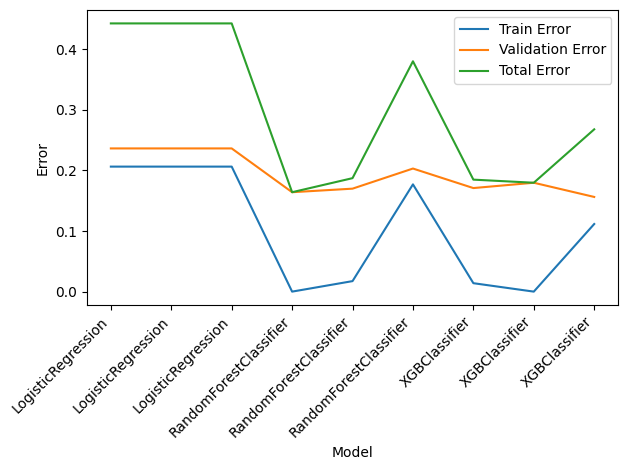

In [100]:
# Plot the bias-variance tradeoff chart for all models
x_values = range(1, len(models) + 1)
plt.plot(x_values, train_errors, label='Train Error')
plt.plot(x_values, val_errors, label='Validation Error')
plt.plot(x_values, np.add(train_errors, val_errors), label='Total Error')
plt.xticks(x_values, model_names, rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Error')
plt.legend()
plt.tight_layout()
plt.show()

In [101]:
# Calculate model performance metrics for the final selected model using the test dataset

In [108]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,age_outlier
4693,543,0,32,7,147256.86,1,1,0,112771.95,1,0,0,0
3735,447,0,32,10,0.00,1,1,1,151815.76,1,0,0,0
9978,774,1,40,9,93017.47,2,1,0,191608.97,1,0,0,0
6580,527,0,30,6,126663.51,1,1,1,162267.91,0,1,0,0
366,540,0,42,9,87271.41,2,1,0,172572.64,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,622,1,31,7,0.00,1,1,0,35408.77,1,0,0,0
8580,529,0,31,6,152310.55,1,1,0,13054.25,1,0,0,0
4163,627,0,35,7,0.00,2,0,1,193022.44,1,0,0,0
8538,731,0,33,5,137388.01,2,1,0,165000.68,0,0,1,0


In [119]:
# Dropping age_outlier column from X_train
X_train = X_train.drop('age_outlier', axis=1)
X_val = X_val.drop('age_outlier', axis=1)

KeyError: "['age_outlier'] not found in axis"

In [112]:
# Define the first random forest and last XGBoost models
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=3, min_child_weight=1, gamma=0, 
                          subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, 
                          scale_pos_weight=1, random_state=42)

# Train the models on the full training dataset
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [114]:
# Test the models on the test dataset
rf_y_pred = rf_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)

In [117]:
# Calculate and print the performance metrics of the models on the test dataset
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("XGBoost:")
print("Accuracy:",xgb_accuracy )
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

Random Forest:
Accuracy: 0.863
Precision: 0.7575757575757576
Recall: 0.44529262086513993
F1 Score: 0.5608974358974359
XGBoost:
Accuracy: 0.8655
Precision: 0.748
Recall: 0.4758269720101781
F1 Score: 0.5816485225505444


In [123]:
# Make predictions on the training, validation, and test sets
y_pred_train = xgb_model.predict(X_train)
y_pred_val = xgb_model.predict(X_val)
y_pred_test = xgb_model.predict(X_test)

# Calculate the performance metrics for the training set
train_acc = accuracy_score(y_train, y_pred_train)
train_prec = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_auc = roc_auc_score(y_train, y_pred_train)

# Calculate the performance metrics for the validation set
val_acc = accuracy_score(y_val, y_pred_val)
val_prec = precision_score(y_val, y_pred_val)
val_rec = recall_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val)
val_auc = roc_auc_score(y_val, y_pred_val)

# Calculate the performance metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_test)

# Print the performance metrics for all three sets
print("Performance Metrics:")
print("| Metric        | Training Set | Validation Set | Test Set |")
print("|---------------|--------------|----------------|----------|")
print(f"| Accuracy      | {train_acc:.4f}       | {val_acc:.4f}         | {test_acc:.4f}   |")
print(f"| Precision     | {train_prec:.4f}       | {val_prec:.4f}         | {test_prec:.4f}   |")
print(f"| Recall        | {train_rec:.4f}       | {val_rec:.4f}         | {test_rec:.4f}   |")
print(f"| F1 Score      | {train_f1:.4f}       | {val_f1:.4f}         | {test_f1:.4f}   |")
print(f"| ROC AUC Score | {train_auc:.4f}       | {val_auc:.4f}         | {test_auc:.4f}   |")


Performance Metrics:
| Metric        | Training Set | Validation Set | Test Set |
|---------------|--------------|----------------|----------|
| Accuracy      | 0.8855       | 0.8545         | 0.8655   |
| Precision     | 0.8392       | 0.8248         | 0.7480   |
| Recall        | 0.5252       | 0.4748         | 0.4758   |
| F1 Score      | 0.6460       | 0.6027         | 0.5816   |
| ROC AUC Score | 0.7501       | 0.7221         | 0.7183   |
